# **Project Name -  MOVIE RECOMMENDATIN SYSTEM**

#####  **Contribution**    - Individual
##### **Team Member 1 - Kartik Dalal**

# **Project Summary -**

This project implements a Content-Based Movie Recommendation System using Natural Language Processing (NLP) and Machine Learning techniques. The system recommends movies similar to a user's input based on the internal characteristics of the movies themselves.

🔧 Feature Engineering
To prepare the movie data for analysis, I utilized vectorization using TF-IDF Term Frequency-Inverse Document Frequency. TF-IDF vectorization takes the raw text and converts it into numerical values in a way that will weigh high for meaningful words, and low for words that do not mean anything, such as the words: "the," and "and." When converted to numerical values, the model will weigh high on the unique words from each movie's plot—the function will tag the high weight high important words like genres, cast names or keywords that define what a movie is.

🤝 Similarity Calculation
The next steps will be to use Cosine Similarity to determine how similar two movies are, after the text features will be vectorized. Cosine Similarity determines how aligned two movie vectors are in the feature space— if two movies have very similar content, the similarity vector would point in a similar direction, so you will have a high similarity score.

🎬 Recommendation Process
Having described how the data will be converted, scored, and given similarity for recommendations, it is useful to know how the recommendation process will occur from the user's perspective:
1. User types the name of a movie they like.
2. The system will try to find the nearest matching title to the variable input while accounting for minor typos or fuzzy word matches in the input (using fuzzy matching through difflib).
3. With a title that matches a title in the dataset, the system will retrieve that title's similarity information with all other movies (from an

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


With the current era of digital streaming and plenty of online content, customers tend to get frustrated with the vast number of movie options. Navigating through platforms or relying on top charts hardly fulfills personal tastes. Such a failure in personalization may result in a negative user experience and lower engagement.

Almost all commercial recommendation systems target user interaction data, including ratings, clicks, or view history. This data might be unavailable at times, particularly for new users or newly released content.

Therefore, the problem is to design an intelligent recommendation system that:

- Makes good and useful recommendations.

- Takes advantage of available movie metadata such as genres, cast, director, and keywords.

- Is both efficient and scalable for web or app use.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [106]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
warnings.filterwarnings('ignore')
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [108]:
# Load Dataset

In [109]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_SETS/Copy of Copy of movies.csv')

### Dataset First View

In [110]:
# Dataset First Look

data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


### Dataset Rows & Columns count

In [111]:
# Dataset Rows & Columns count

data.shape

(4803, 24)

### Dataset Information

In [112]:
# Dataset Info

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

#### Duplicate Values

In [113]:
# Dataset Duplicate Value Count

data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [114]:
# Missing Values/Null Values Count

data.isnull().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


<Axes: >

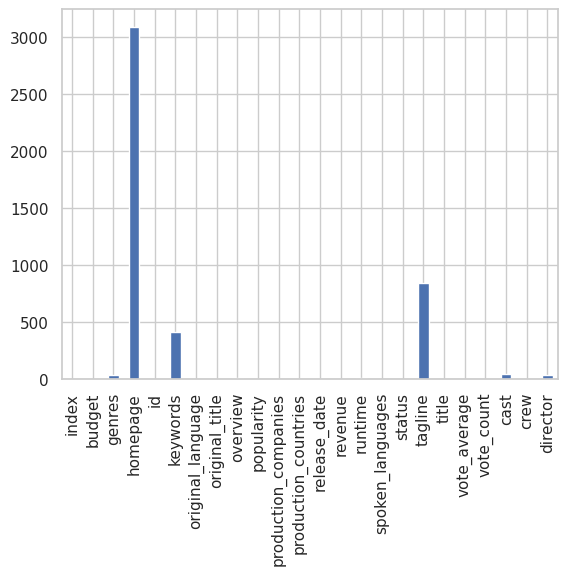

In [115]:
# Visualizing the missing values

data.isnull().sum().plot.bar()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [116]:
# Dataset Columns

data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [117]:
# Dataset Describe

data.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [118]:
# Check Unique Values for each variable.

for i in data.columns:
  print(f'The number of unique values of {i} are : {data[i].nunique()}')

The number of unique values of index are : 4803
The number of unique values of budget are : 436
The number of unique values of genres are : 1168
The number of unique values of homepage are : 1691
The number of unique values of id are : 4803
The number of unique values of keywords are : 4219
The number of unique values of original_language are : 37
The number of unique values of original_title are : 4801
The number of unique values of overview are : 4800
The number of unique values of popularity are : 4802
The number of unique values of production_companies are : 3697
The number of unique values of production_countries are : 469
The number of unique values of release_date are : 3280
The number of unique values of revenue are : 3297
The number of unique values of runtime are : 156
The number of unique values of spoken_languages are : 544
The number of unique values of status are : 3
The number of unique values of tagline are : 3944
The number of unique values of title are : 4800
The numb

## 3. ***Data Wrangling***

### Data Wrangling Code

In [119]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [120]:
data = data.fillna('')

In [121]:
# Write your code to make your dataset analysis ready.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 4803 non-null   int64         
 1   budget                4803 non-null   int64         
 2   genres                4803 non-null   object        
 3   homepage              4803 non-null   object        
 4   id                    4803 non-null   int64         
 5   keywords              4803 non-null   object        
 6   original_language     4803 non-null   object        
 7   original_title        4803 non-null   object        
 8   overview              4803 non-null   object        
 9   popularity            4803 non-null   float64       
 10  production_companies  4803 non-null   object        
 11  production_countries  4803 non-null   object        
 12  release_date          4802 non-null   datetime64[ns]
 13  revenue           

In [122]:
data.isnull().sum()

,0
index,0
budget,0
genres,0
homepage,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0


### What all manipulations have you done and insights you found?

All the missing values were replaced with "Unkown" .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [123]:
data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

#### Chart - 1 - Visualizing Release year

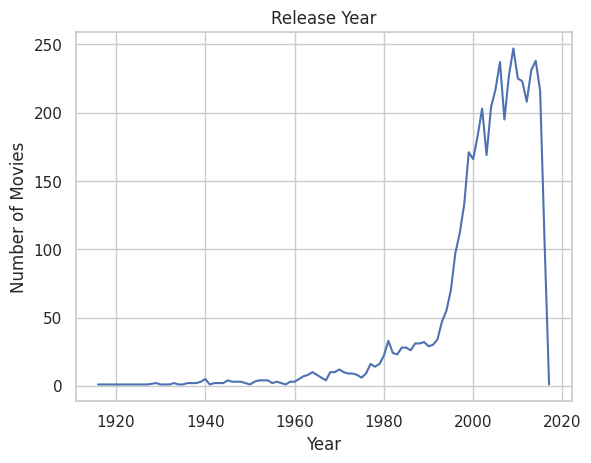

In [124]:
# Chart - 1 visualization code

data['release_year'] = (data['release_date']).dt.year
data['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Top 10 Original Languages

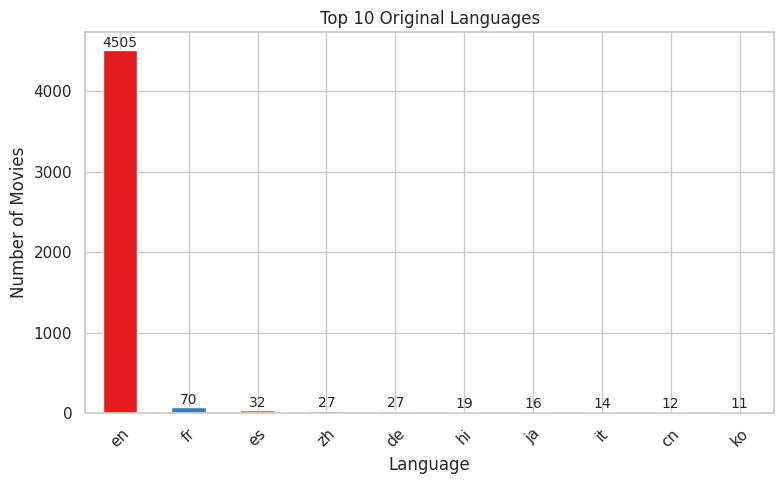

In [125]:
# Chart - 2 visualization code

# data['original_language'].value_counts().head(10).plot(kind='bar')

import matplotlib.pyplot as plt

# Get the top 10 languages and their counts
lang_counts = data['original_language'].value_counts().head(10)

# Plot
ax = lang_counts.plot(kind='bar', figsize=(8, 5),color = sns.color_palette ('Set1'))
plt.title('Top 10 Original Languages')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Add labels on top of bars
for i, value in enumerate(lang_counts):
    ax.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3   - Top 10 Genres

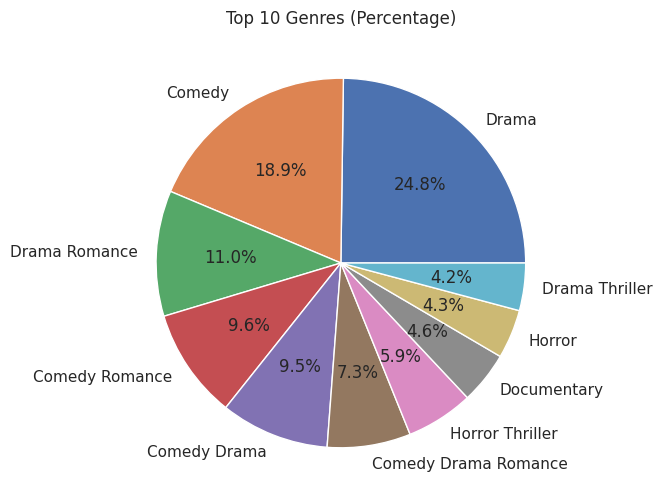

In [126]:
# # Chart - 3 visualization code

data['genres'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=0)
plt.title('Top 10 Genres (Percentage)')
plt.ylabel('')  # hides y-axis label
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4  - Top 10 Directors based on most movies directed

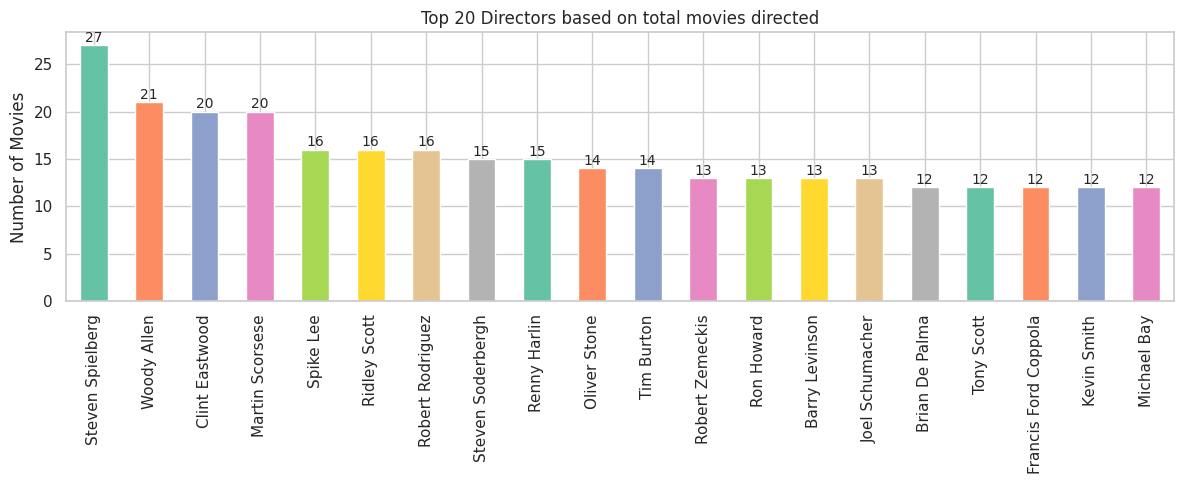

In [127]:
# Chart - 4 visualization code


# Filter out empty string entries
filtered_directors = data[data['director'] != '']

# Get top 20 directors by count
lang_counts1 = filtered_directors['director'].value_counts().head(20)

aa = lang_counts1.plot(kind='bar' ,figsize=(12, 5),color = sns.color_palette ('Set2'))

plt.title('Top 20 Directors based on total movies directed')
plt.xlabel('')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)

for i, value in enumerate(lang_counts1):
    aa.text(i, value + 0.01, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: ylabel='director'>

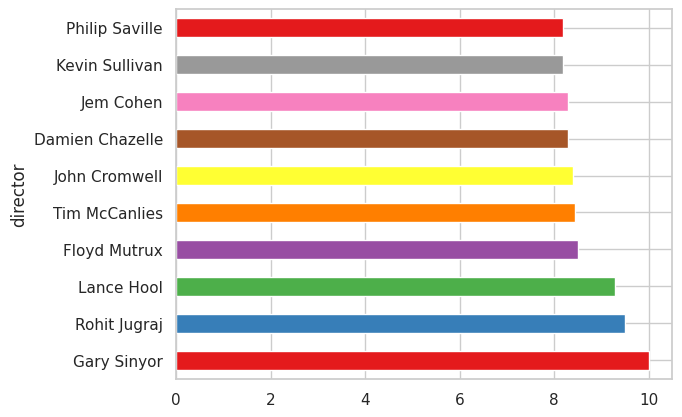

In [128]:
# Chart - 5 visualization code

data.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(10).plot(kind='barh' , color = sns.color_palette ('Set1'))


Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Total Revenue by Genre

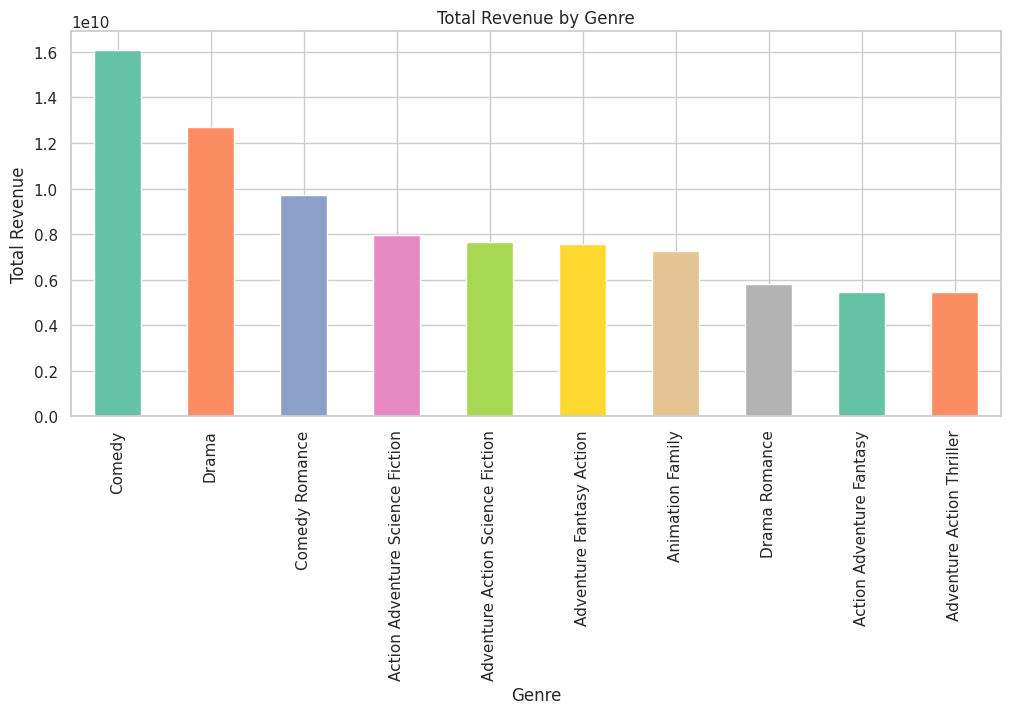

In [129]:
# Chart - 6 visualization code

data.groupby('genres')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(12, 5) ,color = sns.color_palette ('Set2'))
plt.title('Total Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

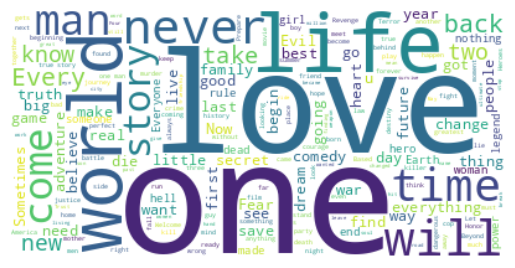

In [130]:
# Chart - 7 visualization code

from wordcloud import WordCloud
text = ' '.join(data['tagline'].dropna())
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Revenue vs Budget

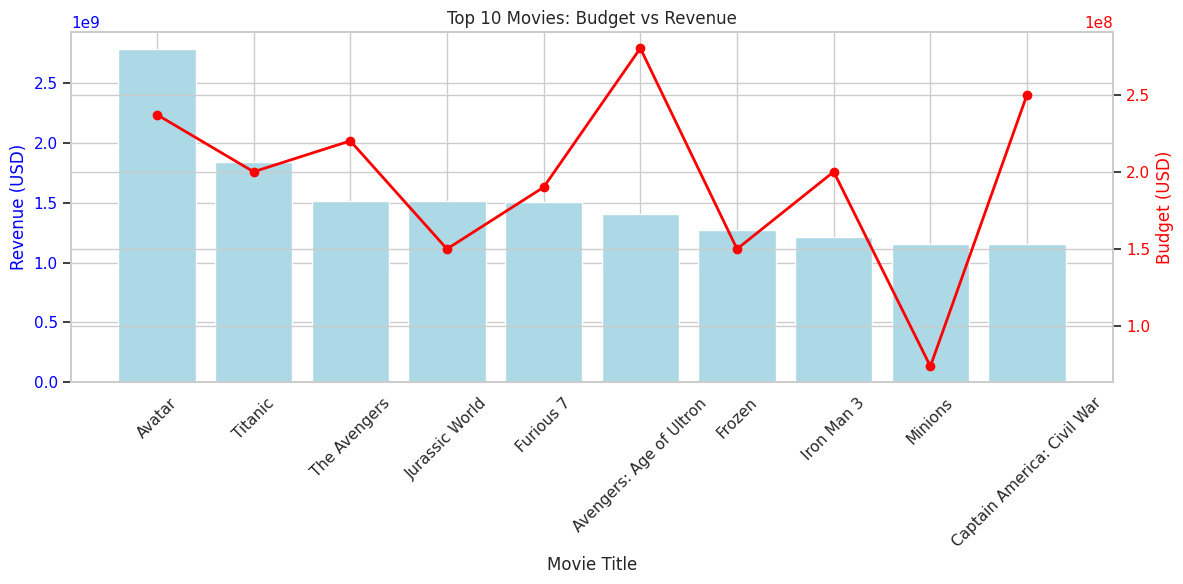

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

# Select top 10 movies by revenue
top_movies = data.sort_values(by='revenue', ascending=False).head(10)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for revenue
ax1.bar(top_movies['title'], top_movies['revenue'], color='lightblue', label='Revenue')
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Revenue (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Line plot for budget
ax2 = ax1.twinx()
ax2.plot(top_movies['title'], top_movies['budget'], color='red', marker='o', linewidth=2, label='Budget')
ax2.set_ylabel('Budget (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Top 10 Movies: Budget vs Revenue')
fig.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Runtime

<Axes: ylabel='runtime'>

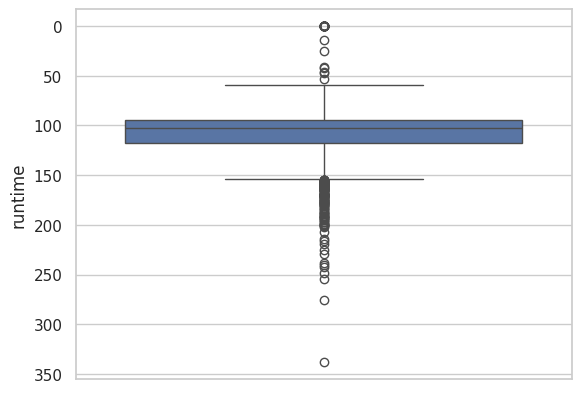

In [132]:
# Chart - 9 visualization code

sns.boxplot(y=data['runtime'])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10 - Top 20 Most Frequent Actors

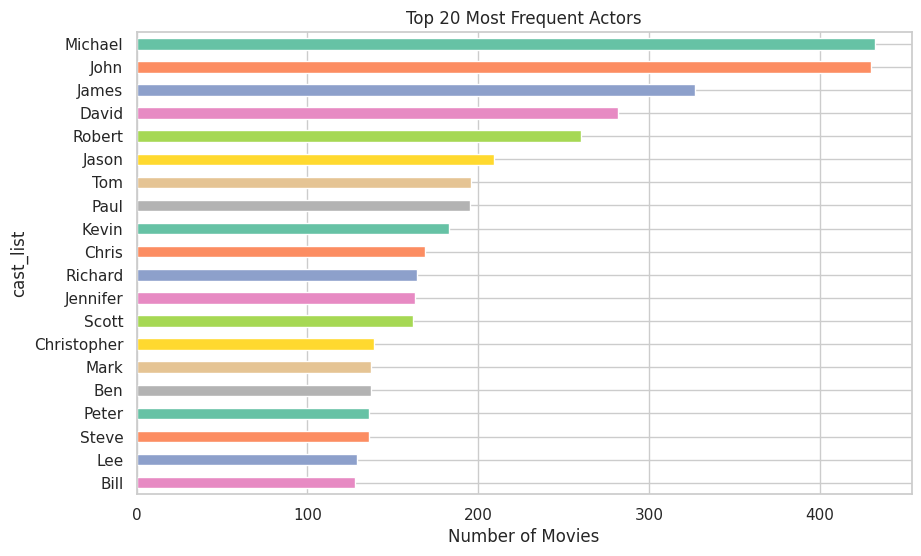

In [133]:
# Chart - 10 visualization codetop_actors = cast_exploded['cast_list'].value_counts().head(20)
# Split and explode the cast column
data['cast'] = data['cast'].fillna('')  # Handle nulls
data['cast_list'] = data['cast'].apply(lambda x: x.split(' '))
cast_exploded = data.explode('cast_list')

top_actors = cast_exploded['cast_list'].value_counts().head(20)
top_actors.plot(kind='barh', figsize=(10,6), color = sns.color_palette('Set2') ,title='Top 20 Most Frequent Actors')
plt.xlabel('Number of Movies')
plt.gca().invert_yaxis()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Top 10 Actors by Avg. Rating

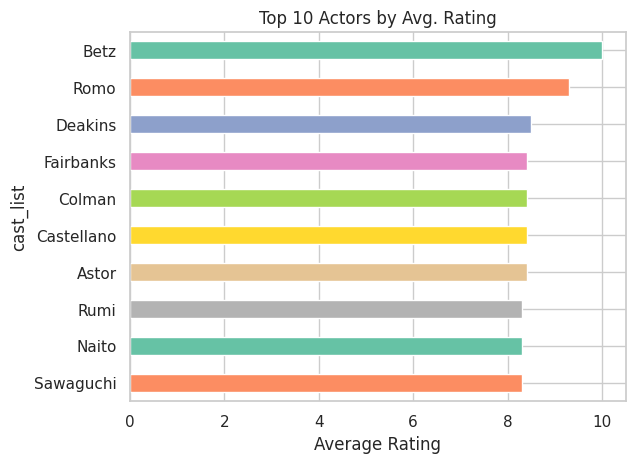

In [134]:
# Chart - 11 visualization code

actor_avg_rating = cast_exploded.groupby('cast_list')['vote_average'].mean()
actor_avg_rating.sort_values(ascending=False).head(10).plot(kind='barh', color = sns.color_palette("Set2") ,title='Top 10 Actors by Avg. Rating')
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Top 10 Actors by Total Revenue

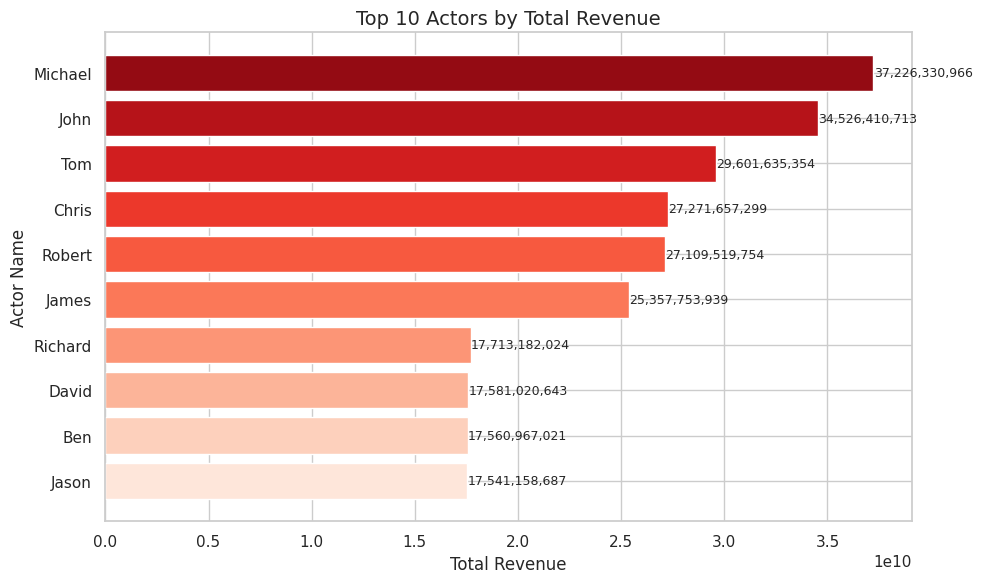

In [135]:
# # Chart - 12 visualization code

# actor_revenue = cast_exploded.groupby('cast_list')['revenue'].sum()
# actor_revenue.sort_values(ascending=False).head(10).plot(kind='barh',color = sns.color_palette('Set1') ,title='Top 10 Actors by Revenue')
# plt.xlabel('Total Revenue')
# plt.gca().invert_yaxis()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group and sort revenue per actor
actor_revenue = cast_exploded.groupby('cast_list')['revenue'].sum()
top_actors = actor_revenue.sort_values(ascending=False).head(10)

# Generate and reverse the 'Reds' color palette
reds = sns.color_palette("Reds", n_colors=10)[::-1]  # Dark red at top, light red at bottom

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_actors.index, top_actors.values, color=reds)

# Add title and labels
ax.set_title('Top 10 Actors by Total Revenue', fontsize=14)
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Actor Name')
ax.invert_yaxis()  # Highest at the top

# Add value labels
for i, value in enumerate(top_actors):
    ax.text(value + 1e7, i, f'{value:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [136]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

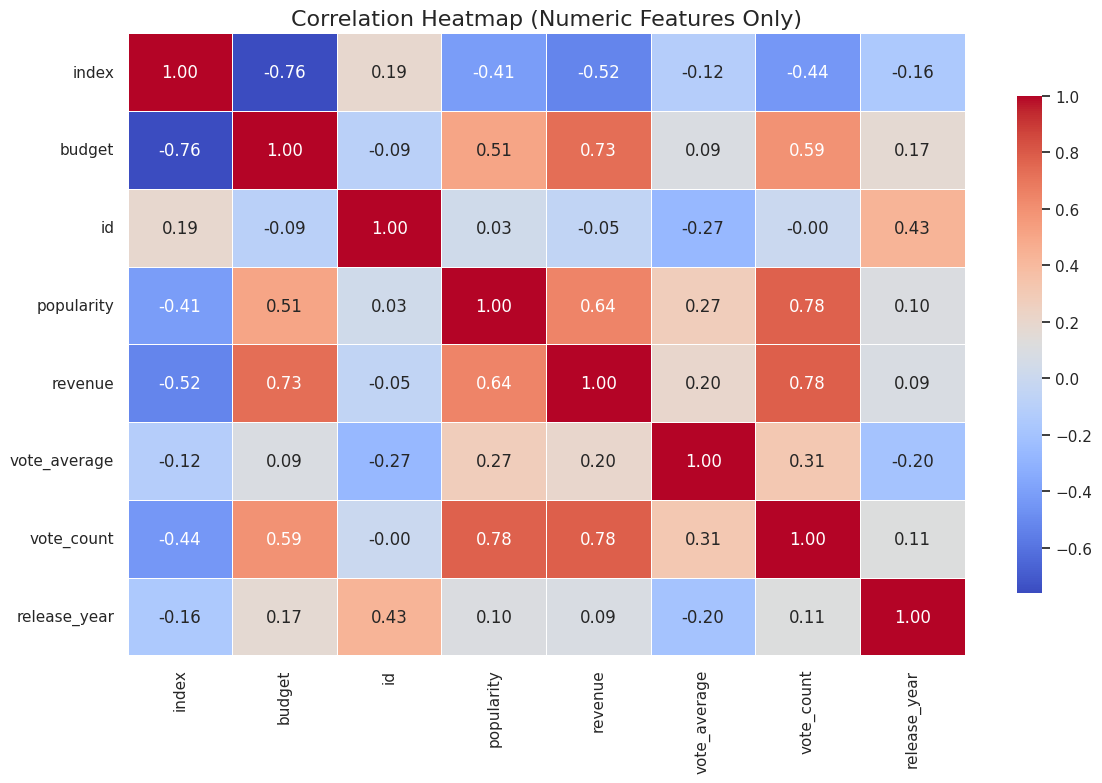

In [137]:
# Correlation Heatmap visualization code
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap (Numeric Features Only)', fontsize=16)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

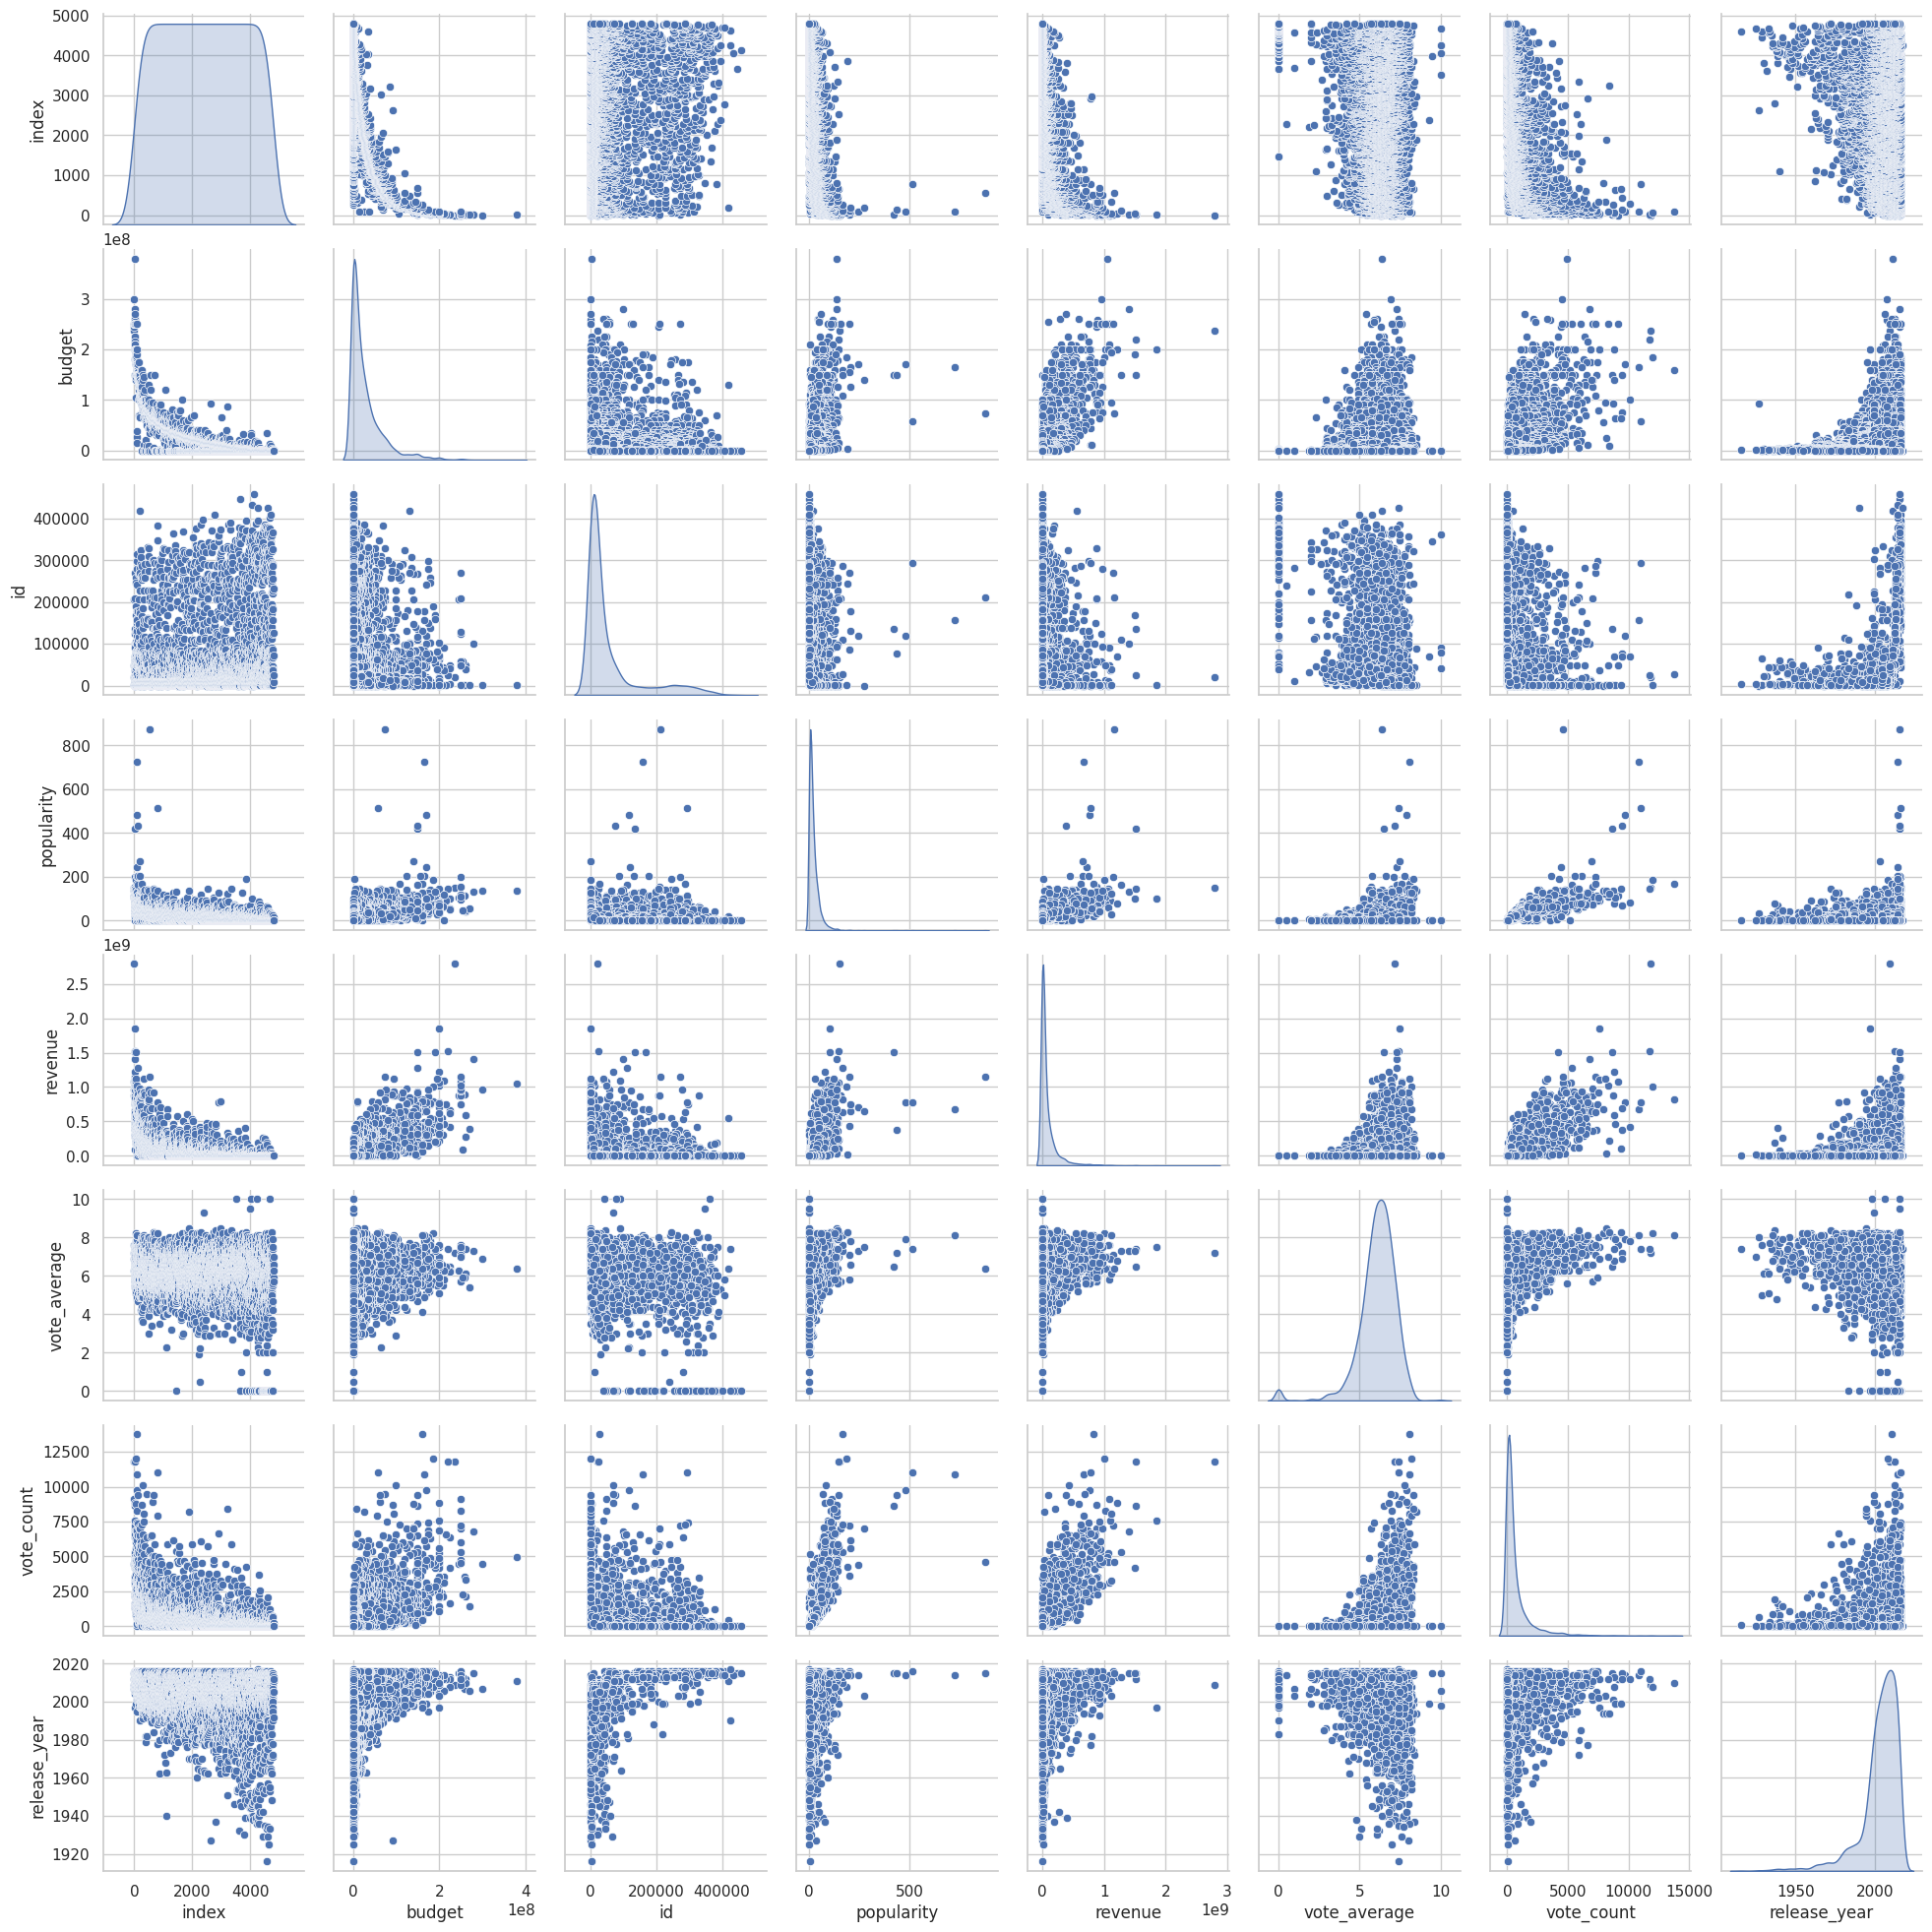

In [138]:
# Pair Plot visualization code

sns.pairplot(data, diag_kind='kde')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

In [139]:
# Manipulate Features to minimize feature correlation and create new features

In [140]:
features = ['genres','keywords','tagline','cast','director']

In [141]:
features

['genres', 'keywords', 'tagline', 'cast', 'director']

In [142]:
data[features].isnull().sum()

,0
genres,0
keywords,0
tagline,0
cast,0
director,0


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
data['combine'] = data['genres'] +  data['keywords'] +  data['tagline'] +  data['cast'] +  data['director']

In [ ]:
data['combine']

,combine
0,Action Adventure Fantasy Science Fictioncultur...
1,Adventure Fantasy Actionocean drug abuse exoti...
2,Action Adventure Crimespy based on novel secre...
3,Action Crime Drama Thrillerdc comics crime fig...
4,Action Adventure Science Fictionbased on novel...
...,...
4798,Action Crime Thrillerunited states\u2013mexico...
4799,Comedy RomanceA newlywed couple's honeymoon is...
4800,Comedy Drama Romance TV Moviedate love at firs...
4801,A New Yorker in ShanghaiDaniel Henney Eliza Co...


#### 10. Text Vectorization

In [143]:
# Vectorizing Text

### **using TF-IDF**
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

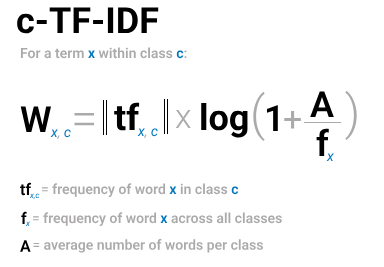

In [146]:
# vectorid

vectorizer = TfidfVectorizer()
film_vector = vectorizer.fit_transform(data['combine'])
print(film_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 111820 stored elements and shape (4803, 27580)>
  Coords	Values
  (0, 245)	0.07858581760804864
  (0, 444)	0.09109355212252296
  (0, 8936)	0.11806131645084655
  (0, 21836)	0.09966592997173947
  (0, 9304)	0.27385789694599244
  (0, 4456)	0.2179967521551067
  (0, 10193)	0.1653243242081299
  (0, 22916)	0.3366875640692919
  (0, 26334)	0.130597230719163
  (0, 4676)	0.24529097704249617
  (0, 22778)	0.27385789694599244
  (0, 24197)	0.07518543993419267
  (0, 27161)	0.12619886579371511
  (0, 18164)	0.08690831799482268
  (0, 18558)	0.26121683351048536
  (0, 21521)	0.15623566659433683
  (0, 27182)	0.23480088356130557
  (0, 27540)	0.19771357974524179
  (0, 21487)	0.21550128478931552
  (0, 22464)	0.2020708956871175
  (0, 26547)	0.19638671147741735
  (0, 23267)	0.16128139780622522
  (0, 14550)	0.22368093636480682
  (0, 16614)	0.1569607387745327
  (0, 20729)	0.27385789694599244
  :	:
  (4801, 18790)	0.22450140828104795
  (4801, 11776)	0.3005

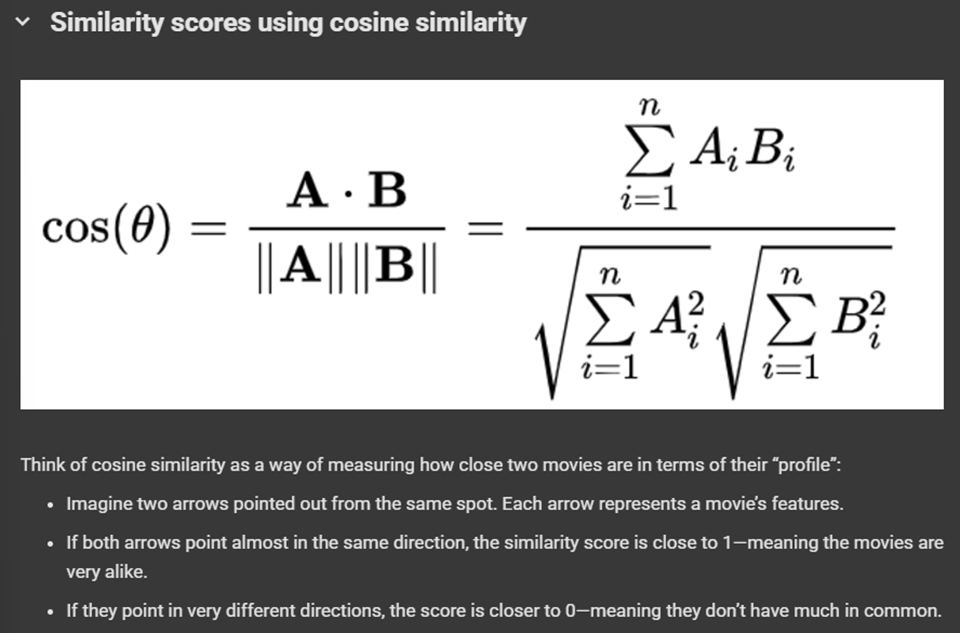

In [147]:
similarity = cosine_similarity(film_vector)

In [148]:
print(similarity)

[[1.         0.06865296 0.01492221 ... 0.         0.         0.        ]
 [0.06865296 1.         0.02799128 ... 0.01243107 0.         0.        ]
 [0.01492221 0.02799128 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.01243107 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


##### Which text vectorization technique have you used and why?

Answer Here.

## ***7. ML Model Implementation***

# ML Model - 1

##Content-Based Movie Recommendation Function

In [150]:
from operator import index

def Movie_recommendation():
  movie_name = input('Enter your favourite movie name : ')
  list_of_all_titles = data['title'].tolist()
  find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
  close_match = find_close_match[0]
  index_of_the_movie = data[data.title == close_match]['index'].values[0]
  similarity_score = list(enumerate(similarity[index_of_the_movie]))
  similarity_score_sorted = sorted(similarity_score, key = lambda x:x[1], reverse = True)
  print('Movies suggested for you : \n')
  for i in range(29):
    index = similarity_score_sorted[i][0]
    print(data['title'][index])

Movie_recommendation()

Enter your favourite movie name : Avengers
Movies suggested for you : 

The Avengers
Avengers: Age of Ultron
Captain America: The Winter Soldier
Iron Man 2
The Incredible Hulk
Captain America: Civil War
X-Men
Thor
X-Men: Apocalypse
X2
Thor: The Dark World
X-Men: The Last Stand
Deadpool
Ant-Man
The Amazing Spider-Man 2
X-Men: Days of Future Past
Iron Man
The Helix... Loaded
Man of Steel
Superman II
X-Men: First Class
Kick-Ass 2
Iron Man 3
The Spirit
Batman v Superman: Dawn of Justice
Zodiac
A Scanner Darkly
Guardians of the Galaxy
What's Your Number?


#### 1. Explain the ML Model used and it's performance .


### Model Type:Content-Based Filtering using Cosine Similarity.

- Feature Extraction:
 - Combines text features like genres, keywords, cast, director into a single column (e.g., combine).

- Vectorization:

 - Converts text into numerical format using TF-IDF Vectorizer or CountVectorizer.

- Similarity Computation:

 - Calculates Cosine Similarity between movies to build a similarity matrix (similarity.pkl).

 - Recommendation Logic:

 - Finds the most similar movies to the input title based on similarity scores and recommends the top 29.

# **Conclusion**

The Movie Recommendation System effectively uses machine learning with content-based filtering. The system recommends movies similar in content to a user input by utilizing movie metadata like genres, cast, director, and keywords. TF-IDF vectorization is employed to convert textual information into numerical representation, and cosine similarity is calculated to identify and rank similar movies.

The model is effective, interpretable, and does well for users who want suggestions based on a particular movie. It doesn't use user preferences or past ratings, yet it makes extremely relevant suggestions purely on the basis of content attributes. Hence, it can be a useful tool in the case of first-time users or situations where user data is sparse.

In future research, the system can be extended by incorporating collaborative filtering, user behavior monitoring, or hybrid methods for enhanced personalization and accuracy.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***